# **Documentação**

**Aplicação de Algitmos de Machine Learning para Predição da Temperatura Interna ao Final da Corrida de 10km**

* Este projeto se dedica à aplicação de modelos de machine learning para prever a temperatura interna ao término de uma corrida autocontrolada de 10km. 

* A base de dados utilizada neste trabalho é proveniente do artigo de [Andrade et al. (2023)](https://pmc.ncbi.nlm.nih.gov/articles/PMC10988464/), com os dados brutos disponíveis pelos autores diretamente em https://doi.org/10.6084/m9.figshare.21508239.

* Previamente à modelagem, a base de dados foi submetida a um pré-processamento que incluiu a remoção de variáveis não utilizada aos modelos, a alteração da estrutura de dados das variáveis para formatos mais adequados, a eliminação de caracteres inválidos e a substituição de vírgulas por pontos para padronização numérica. 
Detalhes sobre estas transformações estão documentados no notebook **pre-processamento.ipynb** , localizado em **/home/lafise/Desktop/Samuel/leticiaag/pre-processamento.ipynb**. A partir dos dados pré-processados, foram geradas três bases de dados distintas, cada uma configurada para replicar os modelos de variáveis propostos pelos autores originais: Base de Dados 1 (10 variáveis), a Base de Dados 2 (8 variáveis) e a Base de Dados 3 (5 variáveis).

* O objetivo primário deste trabalho é avaliar a performance e otimização dos algoritmos de **Decision Tree, Random Forest, XGBoost e LASSO Regression** sobre as três bases de dados.

* No código abaixo, especificamente, foi realizada a modelagem dos quatro algoritmos de machine learning sobre a **Base de Dados 1**.

* **Variaveis preditoras** - WBGT, Running speed, Initial core, Body mass, Tcore-Tskin, Tskin mean, Sweat rate, VO2max, HR, ΔBM%

* **Variavel predita** - EndTcore

# Importando bibliotecas

## Geral

In [2]:
import pandas as pd #manipulacao de dados
import numpy as np #manipulacao de dados
import seaborn as sns #criacao de graficos
import matplotlib.pyplot as plt #criacao de graficos
from sklearn.metrics import mean_squared_error, r2_score #metricas de avaliacao dos algoritmos 
from sklearn.model_selection import train_test_split, GridSearchCV #amostragem e manipulacao de hiperparametros

## Decison tree

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree #modelo de decision tree e grafico de arvore

## Random Forest

In [4]:
from sklearn.ensemble import RandomForestRegressor #modelo de random forest

## XGBoost

In [5]:
pip install xgboost #instalacao da biblioteca do algoritmo de xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xgboost as xgb #modelo de xgboos

## Regressão de LASSO

In [7]:
from sklearn.linear_model import Lasso # modelo de lasso
from sklearn.preprocessing import StandardScaler # Importado StandardScaler
from sklearn.pipeline import Pipeline # Importado Pipeline

# Importando base de dados

In [8]:
df = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_1.csv") # base de dados usada em Decision tree
df2 = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_1.csv") # base de dados usada em Random Forest
df3 = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_1.csv") # base de dados usada em XGBoost
df4 = pd.read_csv("/home/lafise/Desktop/Samuel/leticiaag/trabalho1/dados_modelo_1.csv") # base de dados usada em Lasso Regression

In [9]:
df.head() #vendo as 5 primeiras linhas do data frame

,EndTCORE_C,WBGT_C,Speed_kmh1,Initial_TCORE_C,Body_mass_kg,TCORE__TSKIN_C,Mean_TSKIN_C,Sweat_rate_Lh1,VO2MAX_mLkg1min1,Heart_rate_bpm,Delta_mass_
0,40.75,29.71,10.1,37.27,67.00,3.55,35.48,1.54,63.3,178,2.30
1,39.55,29.85,9.7,36.06,86.78,3.34,34.51,1.14,54.7,153,1.34
2,38.90,29.77,9.2,36.46,71.30,3.33,34.42,1.46,65.2,135,2.22
3,39.72,29.88,9.9,36.58,64.80,2.75,35.26,1.01,67.0,137,1.54
4,39.65,30.18,9.7,36.88,71.50,4.18,33.95,1.55,60.9,152,2.24


In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EndTCORE_C        75 non-null     float64
 1   WBGT_C            75 non-null     float64
 2   Speed_kmh1        75 non-null     float64
 3   Initial_TCORE_C   75 non-null     float64
 4   Body_mass_kg      75 non-null     float64
 5   TCORE__TSKIN_C    75 non-null     float64
 6   Mean_TSKIN_C      75 non-null     float64
 7   Sweat_rate_Lh1    75 non-null     float64
 8   VO2MAX_mLkg1min1  75 non-null     float64
 9   Heart_rate_bpm    75 non-null     int64  
 10  Delta_mass_       75 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 6.6 KB


# **DECISION TREE**

## Pré processamento - decision tree

In [25]:
X1 = df.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y1 = df["EndTCORE_C"] #separando a variavel predita

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42) #separando a base de dados de treino(80%) e teste(20%).
#a separacao em 80/20 foi escolhida porque a quantidade de dados para treinar o modelo quando a escolhido 70/30 ou 80/10/10 nao disponibilizava dados o suficiente 
#para a criacao do modelo, levando ao underfitting. para mitigar o overfitting comb a distribuicao 80/20, foi usado a tecnica de amostragem K-fold.

In [127]:
#otimizacao de hiperparametros
param_grid = {
    'max_depth': [5, 10, 15, 18, 20], #profundidade máxima da arvore
    'min_samples_leaf': [3, 5, 9, 10], #minimo de amostra por folha
    'min_samples_split': [3, 5, 8, 10], #minimo de amostras para dividir
    'ccp_alpha': [0.00, 0.02, 0.03] #regularizacao do custo de complexidade
}

In [129]:
dt_regressor_base = DecisionTreeRegressor(random_state=42) #criacao da instancia do modelo decision tree, utilizando random_state=42 para asegurar reprodutibilidade 

In [131]:
grid_search = GridSearchCV(estimator=dt_regressor_base, #algoritmo base
                           param_grid=param_grid, #hiperparametros
                           cv=5, #5 K-fold (validacao cruzada)
                           scoring='neg_mean_squared_error', #paramentros de escolha de melhor algoritmo
                           n_jobs=-1, # usa todos os nucleos de processamento disponiveis
                           verbose=1) #exibe de processamento

## Treinamento do modelo - Decision Tree

In [134]:
grid_search.fit(X_train1, y_train1) #treinando o modelos com a base de dados de treino

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.02, 0.03],
                         'max_depth': [5, 10, 15, 18, 20],
                         'min_samples_leaf': [3, 5, 9, 10],
                         'min_samples_split': [3, 5, 8, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [136]:
best_dt_regressor = grid_search.best_estimator_ #pegando os hiperparamentros usados no modelo gerado

In [138]:
print(best_dt_regressor)

DecisionTreeRegressor(ccp_alpha=0.02, max_depth=5, min_samples_leaf=3,
                      min_samples_split=3, random_state=42)


## Avaliando o modelo - Decison tree

**Dados treino**

In [142]:
mse_train = mean_squared_error(y_train1, best_dt_regressor.predict(X_train1)) #calculo de MSE
rmse_train = np.sqrt(mse_train) #calculo de RMSE
r2_train = r2_score(y_train1, best_dt_regressor.predict(X_train1)) #calculo de R2

In [144]:
print(f"\n--- Métricas de Avaliação do Modelo - Dados TREINO ---")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")


--- Métricas de Avaliação do Modelo - Dados TREINO ---
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): 0.56


**Dados Teste**

In [147]:
mse_optimized = mean_squared_error(y_test1, best_dt_regressor.predict(X_test1)) #calculo de MSE
rmse_optimized = np.sqrt(mse_optimized) #calculo de RMSE 
r2_optimized = r2_score(y_test1, best_dt_regressor.predict(X_test1)) #calculo de R2

In [149]:
print(f"\n--- Métricas de Avaliação do Modelo - Dados TESTE---")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f"R-squared (R²): {r2_optimized:.2f}")


--- Métricas de Avaliação do Modelo - Dados TESTE---
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
R-squared (R²): 0.55


## Estrutura da árvore

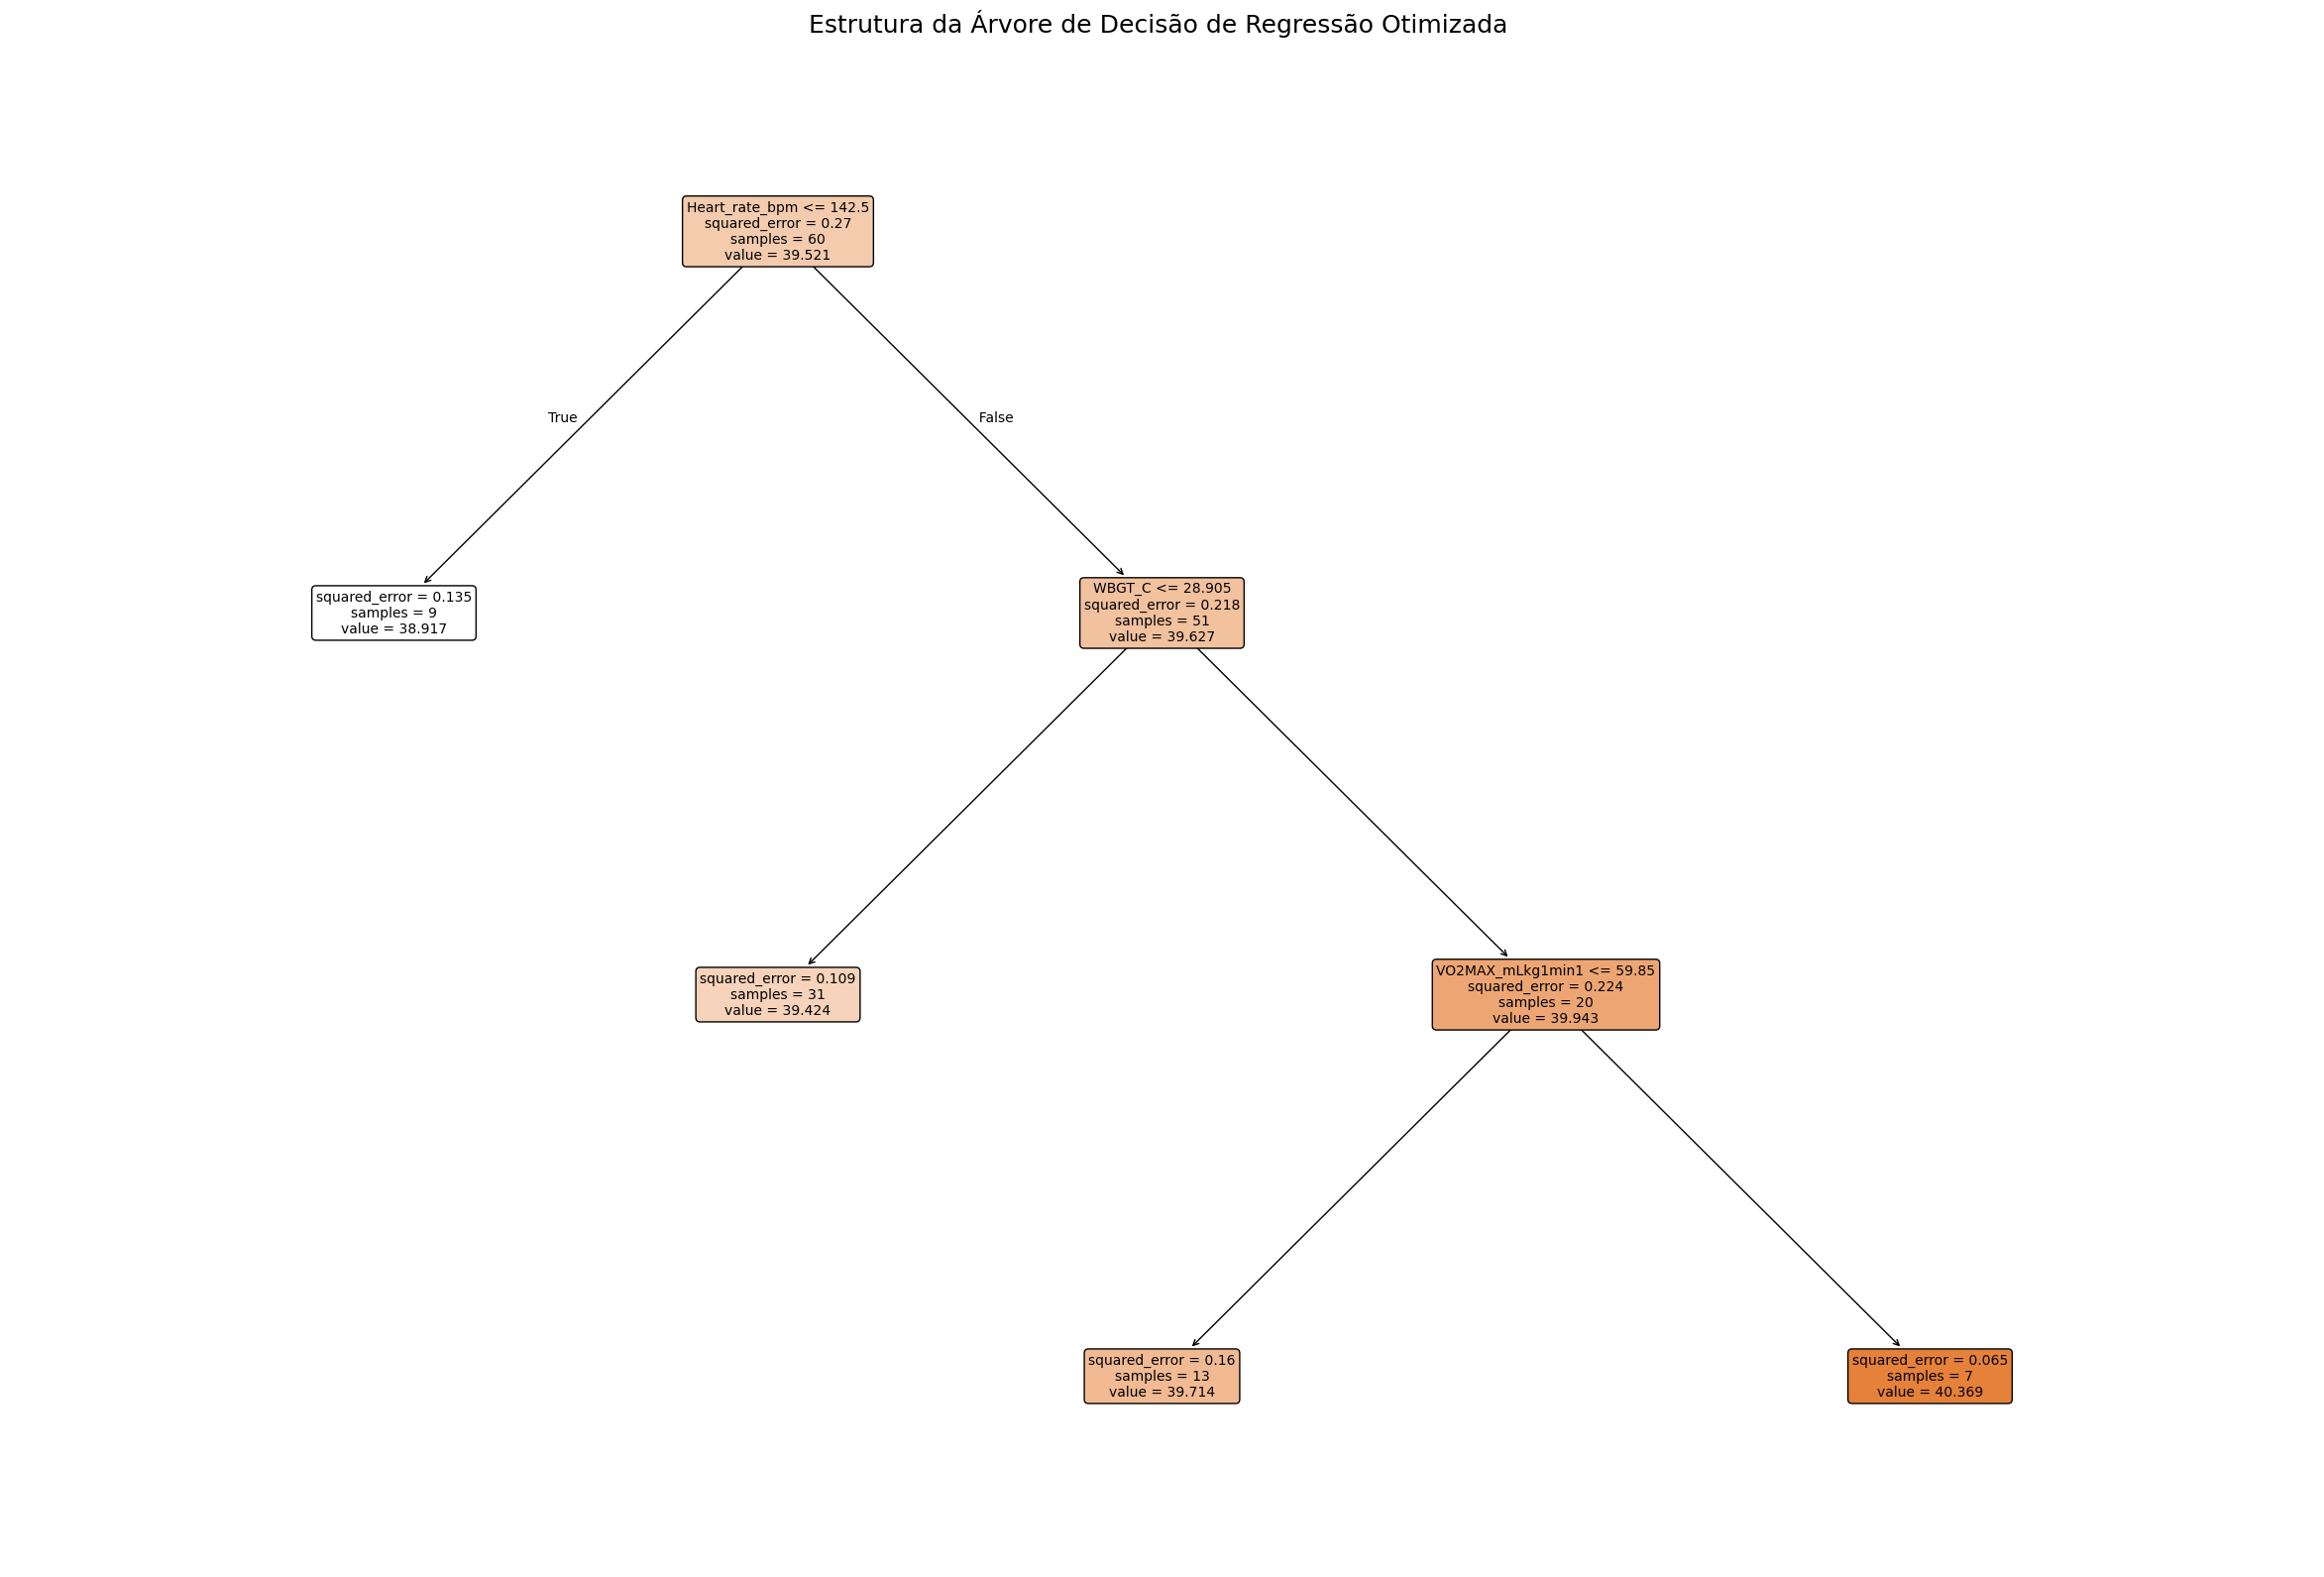

In [95]:
plt.figure(figsize=(30, 20)) #declaracao da figura
plot_tree(best_dt_regressor, feature_names=X1.columns.tolist(), filled=True, rounded=True, fontsize=10) #gerando o grafico
plt.title("Estrutura da Árvore de Decisão de Regressão Otimizada ", fontsize=18) #titulo
plt.show() #mostrando o grafico

# **RANDOM FOREST**

## Pré-processamento - Random forest

In [249]:
X2 = df2.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y2 = df2["EndTCORE_C"] #separando a variavel predita

In [250]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)#separando a base de dados de treino(80%) e teste(20%)

In [291]:
#otimizacao de hiperparametros
param_grid_rf = {
    'n_estimators': [100, 150, 200], # numero de arvores na floresta
    'max_depth': [3, 4, 5, 8], # profundidade máxima de cada arvore
    'min_samples_leaf': [ 10, 8, 12], # minimo de amostras em um nó folha
    'min_samples_split': [ 10, 8, 12], # minimo de amostras para dividir um nó
    'max_features': ['log2'], # numero de features a considerar em cada split
    'ccp_alpha': [0.00, 0.001, 0.002, 0.003] #custo de complexidade
}

In [292]:
rf_regressor_base = RandomForestRegressor(random_state=42) #criacao da instancia do modelo random forest, utilizando random_state=42 para asegurar reprodutibilidade 

In [293]:
grid_search_rf = GridSearchCV(estimator=rf_regressor_base, #algoritmo base
                              param_grid=param_grid_rf, #hiperparametros
                              cv=5, #5 K-fold (validacao cruzada)
                              scoring='neg_mean_squared_error', # otimiza para o menor MSE
                              n_jobs=-1, # usa todos os nucleos disponiveis
                              verbose=1) # exibe o progresso

## Treinamento do modelo - Rondom forest

In [294]:
grid_search_rf.fit(X_train2, y_train2) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.001, 0.002, 0.003],
                         'max_depth': [3, 4, 5, 8], 'max_features': ['log2'],
                         'min_samples_leaf': [10, 8, 12],
                         'min_samples_split': [10, 8, 12],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [295]:
best_params_rf = grid_search_rf.best_params_ 
best_rf_regressor = grid_search_rf.best_estimator_

In [296]:
y_pred_rf_optimized = best_rf_regressor.predict(X_test2)
y_pred_rf_train = best_rf_regressor.predict(X_train2)

## Avaliando o modelo - Random forest

**Dados de treino**

In [297]:
mse_rf_train = mean_squared_error(y_train2, y_pred_rf_train) #calculando MSE
rmse_rf_train = np.sqrt(mse_rf_train) #calculando RMSE
r2_rf_train = r2_score(y_train2, y_pred_rf_train) #calculando R2

In [298]:
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_rf_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_train:.2f}")
print(f"R-squared (R²): {r2_rf_train:.2f}")


--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.16
Root Mean Squared Error (RMSE): 0.40
R-squared (R²): 0.42


**Dados de teste**

In [299]:
mse_rf_optimized = mean_squared_error(y_test2, y_pred_rf_optimized)
rmse_rf_optimized = np.sqrt(mse_rf_optimized)
r2_rf_optimized = r2_score(y_test2, y_pred_rf_optimized)

In [300]:
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_rf_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_optimized:.2f}")
print(f"R-squared (R²): {r2_rf_optimized:.2f}")


--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared (R²): 0.41


# **XGBOOST**

## Pré processamento - XGBoost

In [151]:
X3 = df3.drop("EndTCORE_C", axis=1) #separando as variaveis preditoras
y3 = df3["EndTCORE_C"] #separando a variavel predita

In [153]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=42) #separando a base de dados de treino(80%) e teste(20%)

In [566]:
#otmizacao de hiperparametros
param_grid_xgb = { 
    'n_estimators': [90, 100], # numero de arvores 
    'learning_rate': [0.01, 0.02, 0.05], # taxa de aprendizado
    'max_depth': [2, 3, 5], # profundidade maxima de cada arvore
    'subsample': [0.5, 0.6, 0.7], # subamostragem dos dados de treinamento
    'colsample_bytree': [0.4, 0.5], # subamostragem de colunas ao construir cada arvore
    'gamma': [0.3, 0.4, 0.5], # minima reducao de perda para fazer uma particao
    'min_child_weight': [ 6, 7, 8]
}

In [568]:
xgb_regressor_base = xgb.XGBRegressor(random_state=42, eval_metric='rmse') #criacao da instancia do modelo xgboost, utilizando random_state=42 para asegurar reprodutibilidade 

In [570]:
grid_search_xgb = GridSearchCV(estimator=xgb_regressor_base, #algoritmo base
                               param_grid=param_grid_xgb, #hiperparametros
                               cv=5, #5 K-fold (validacao cruzada)
                               scoring='neg_mean_squared_error', # otimiza para o menor MSE
                               n_jobs=-1, # usa todos os nucleos disponiveis
                               verbose=1) # exibe o progresso

## Treinamento do modelo - XGBoost

In [573]:
grid_search_xgb.fit(X_train3, y_train3) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False,
                                    eval_metric='rmse', feature_types=None,
                                    feature_weights=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=No...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5],
                         'gamma': [0.3, 0.4, 0.5],
                         'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [2, 3, 5], 'min_child_weight': [6, 7, 8],
                         'n_estimators': [90, 100],
                         'subsample': [0.5, 0.6, 0.7]},
             scoring='neg_mean_squared_error', verbose=1)

In [575]:
best_params_xgb = grid_search_xgb.best_params_
best_xgb_regressor = grid_search_xgb.best_estimator_

In [577]:
print(best_xgb_regressor)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


In [579]:
y_pred_xgb_optimized = best_xgb_regressor.predict(X_test3)
y_pred_xgb_train = best_xgb_regressor.predict(X_train3)

## Avaliação do modelo - XGBoost

**Dados de treino**

In [583]:
mse_xgb_train = mean_squared_error(y_train3, y_pred_xgb_train) #calculando MSE
rmse_xgb_train = np.sqrt(mse_xgb_train) #calculando RMSE
r2_xgb_train = r2_score(y_train3, y_pred_xgb_train) #calculando R2

In [585]:
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_xgb_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_train:.2f}")
print(f"R-squared (R²): {r2_xgb_train:.2f}")


--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.07
Root Mean Squared Error (RMSE): 0.27
R-squared (R²): 0.74


**Dados de teste**

In [588]:
mse_xgb_optimized = mean_squared_error(y_test3, y_pred_xgb_optimized) #calculando 
rmse_xgb_optimized = np.sqrt(mse_xgb_optimized)
r2_xgb_optimized = r2_score(y_test3, y_pred_xgb_optimized)

In [590]:
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_xgb_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_optimized:.2f}")
print(f"R-squared (R²): {r2_xgb_optimized:.2f}")


--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.08
Root Mean Squared Error (RMSE): 0.28
R-squared (R²): 0.73


# **LASSO REFRESSION**

## Pré processamento - LASSO regression

In [592]:
X4 = df4.drop("EndTCORE_C", axis=1) #seprando as variaveis preditoras 
y4 = df4["EndTCORE_C"] #separando a variavel predita

In [594]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=42)#separando a base de dados de treino(80%) e teste(20%)

## Treinamento do modelo - LASSO regression

In [596]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), #padroniza as features
    ('lasso', Lasso(random_state=42, max_iter=2000)) #aplica a Regressão Lasso
])


In [598]:
param_grid_lasso = {
    'lasso__alpha': np.logspace(-4, 2, 7) # Testar de 0.0001 a 100 em escala logarítmica
}

In [600]:
grid_search_lasso = GridSearchCV(estimator=pipeline, #estimador agora e o pipeline
                                 param_grid=param_grid_lasso, #hiperparamentros
                                 cv=5, #5 K-fold (validacao cruzada)
                                 scoring='neg_mean_squared_error', # otimiza para o menor MSE
                                 n_jobs=-1, # Usa todos os nucleos disponiveis
                                 verbose=1) # exibe o progresso

In [602]:
grid_search_lasso.fit(X_train4, y_train4) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso',
                                        Lasso(max_iter=2000,
                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='neg_mean_squared_error', verbose=1)

In [606]:
best_params_lasso = grid_search_lasso.best_params_
best_lasso_regressor_pipeline = grid_search_lasso.best_estimator_

In [608]:
print(best_lasso_regressor_pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.001, max_iter=2000, random_state=42))])


In [450]:
y_pred_lasso_optimized = best_lasso_regressor_pipeline.predict(X_test4)
y_pred_lasso_train = best_lasso_regressor_pipeline.predict(X_train4)

## Avaliação do modelo - LASSO regression

**Dados treino**

In [60]:
mse_lasso_train = mean_squared_error(y_train4, y_pred_lasso_train) #calcula MSE
rmse_lasso_train = np.sqrt(mse_lasso_train) #calcula RMSE
r2_lasso_train = r2_score(y_train4, y_pred_lasso_train) #calcula R2

In [451]:
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ---")
print(f"Mean Squared Error (MSE): {mse_lasso_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_train:.2f}")
print(f"R-squared (R²): {r2_lasso_train:.2f}")


--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ---
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R²): 0.88


**Dados teste**

In [452]:
mse_lasso_optimized = mean_squared_error(y_test4, y_pred_lasso_optimized) #calcula MSE
rmse_lasso_optimized = np.sqrt(mse_lasso_optimized) #calcula RMSE
r2_lasso_optimized = r2_score(y_test4, y_pred_lasso_optimized) #calcula R2

In [453]:
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) ---")
print(f"Mean Squared Error (MSE): {mse_lasso_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_optimized:.2f}")
print(f"R-squared (R²): {r2_lasso_optimized:.2f}")


--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) ---
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
R-squared (R²): 0.84


# **Conclusões**

**Decision tree**

O modelo **DecisionTreeRegressor**, configurado com **ccp_alpha=0.02, max_depth=5, min_samples_leaf=3 e min_samples_split=3**, apresentou um desempenho consistente entre os conjuntos de treino e teste. A métrica **R2 de 0.56 (treino)** e **0.55 (teste)** indica uma capacidade preditiva moderada, explicando aproximadamente 55-56% da variância na variável dependente. O RMSE, com valores de **0.34 (treino) e 0.36 (teste)**, sugere que, em média, as previsões do modelo desviam-se em cerca de 0.36 °C do valor real. A consistência entre as métricas de treino e teste é um indicativo positivo de que o modelo possui boa generalização

__________________________________________________________________________________________________________________________________________
**Random forest**

O modelo **RandomForestRegressor** otimizado, configurado com **n_estimators=150, max_depth=3, min_samples_leaf=8, min_samples_split=10, max_features='log2' e ccp_alpha=0.002**, demonstrou um desempenho consistente entre os conjuntos de treino e teste. Com um **R2 de 0.42 (treino) e 0.41 (teste)**, o modelo explica de forma limitada da variância na variável dependente. Os valores de **RMSE de 0.40 (treino) e 0.41 (teste)** indicam que o erro médio de previsão é de aproximadamente 0.41°C da variável de saída.
___________________________________________________________________________________________________________________________
**XGBoost**